In [1]:
import pandas as pd

In [2]:
hits = pd.read_csv("/mnt/lab_data3/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/GM12878_03.01.2022_bias_128_4_1234_0.4_fold_0/09_06_2022_motif_scanning/mooods_run/overlaps_resolved_based_on_cwm_activations_normed.bed",sep="\t", header=None)




In [3]:
import pyBigWig as pw

gm="/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/merged/GM12878/ATAC/GM12878_wo_bias.bw"
gm_obs="/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/merged/GM12878/ATAC/GM12878_unstranded.bw"

gm_bw = pw.open(gm)
gm_obs = pw.open(gm_obs)


In [4]:
keyd="0_1_CTCF_MA0139.1"
keyd="0_2_SPIB_MOUSE.H11MO.0.A"
hits_ordered_by_cwm = hits[hits[3]==keyd].sort_values(by=[9], axis=0, ascending=False)
hits_ordered_by_pwm = hits[hits[3]==keyd].sort_values(by=[5], axis=0, ascending=False)


In [5]:
import numpy as np
cwm_values = []
cwm_values_sum = []

for i,r in hits_ordered_by_cwm.iterrows():
    motif_mid=(r[1]+r[2])//2
    cwm_values.append(np.nan_to_num(gm_bw.values(r[0],motif_mid-100,motif_mid+100)))
    cwm_values_sum.append(r[9])

In [6]:
import numpy as np
cwm_values_obs = []
cwm_values_sum_obs = []

for i,r in hits_ordered_by_cwm.iterrows():
    motif_mid=(r[1]+r[2])//2
    cwm_values_obs.append(np.nan_to_num(gm_obs.values(r[0],motif_mid-100,motif_mid+100)))
    cwm_values_sum_obs.append(r[9])

In [7]:
import numpy as np
pwm_values = []
pwm_values_sum = []
for i,r in hits_ordered_by_pwm.iterrows():
    motif_mid=(r[1]+r[2])//2
    pwm_values.append(np.nan_to_num(gm_bw.values(r[0],motif_mid-100,motif_mid+100)))
    pwm_values_sum.append(r[5])

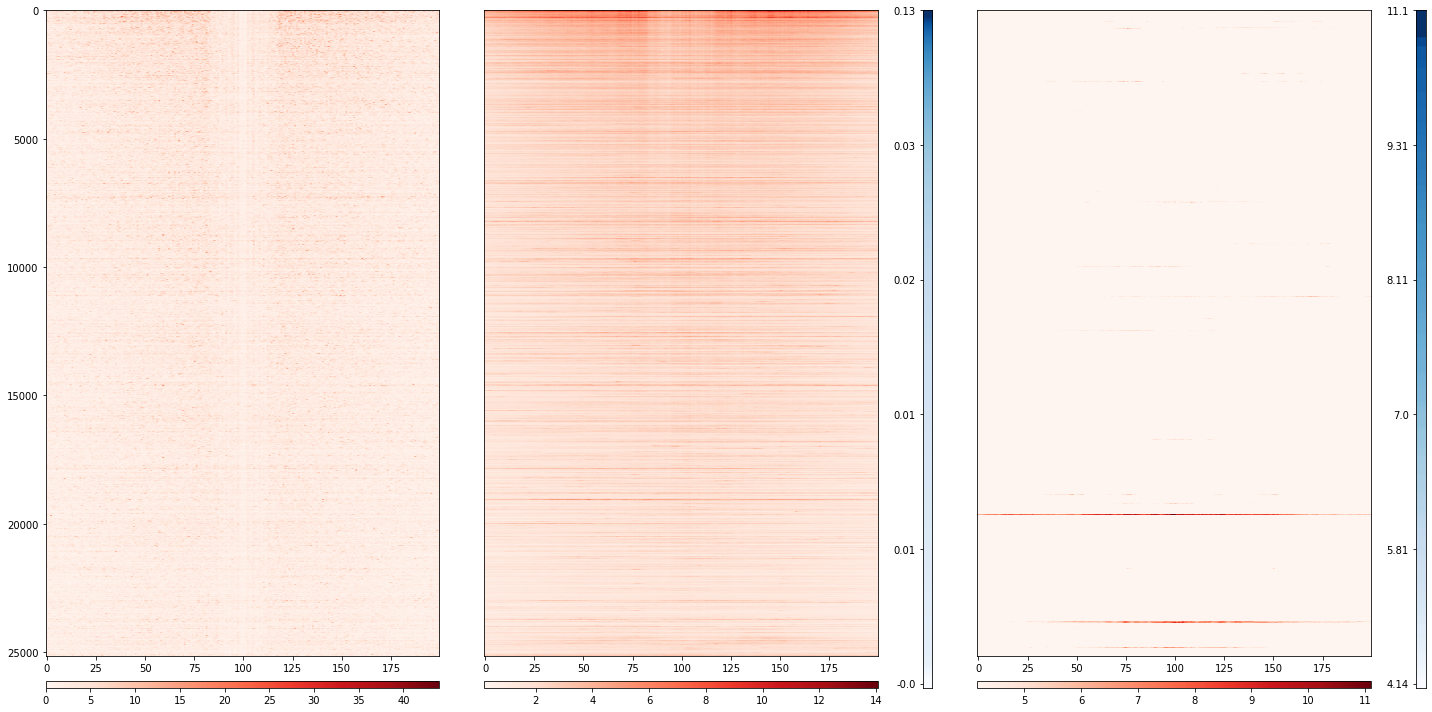

In [8]:

import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42 

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

no_signals=len(cwm_values)
fig,ax = plt.subplots(1,5,figsize = (20, 10), gridspec_kw={'width_ratios': [4, 4, 0.1, 4, 0.1]})

vmin, vmax = np.percentile(cwm_values_obs, [1, 99])
im1 = ax[0].imshow(cwm_values_obs,cmap="Reds",aspect="auto",norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))
#ax[0].get_xaxis().set_visible(False)
#ax[0].get_yaxis().set_visible(False)

divider = make_axes_locatable(ax[0])
cay = divider.append_axes('bottom', size='1%', pad=0.35)
fig.colorbar(im1, cax=cay, orientation='horizontal')

idx=1
# corrected
vmin, vmax = np.percentile(cwm_values, [1, 99])
im2 = ax[idx].imshow(cwm_values,cmap="Reds",aspect="auto",norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))
ax[idx].get_xaxis().set_visible(True)
ax[idx].get_yaxis().set_visible(False)

divider = make_axes_locatable(ax[idx])
cay = divider.append_axes('bottom', size='1%', pad=0.35)
fig.colorbar(im2, cax=cay, orientation='horizontal')

idx = 2
vmin, vmax = np.percentile(cwm_values_sum, [1, 99])
ax[idx].imshow(np.array(cwm_values_sum).reshape((-1,1)),cmap="Blues",aspect="auto",norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))
ax[idx].get_xaxis().set_visible(False)
ax[idx].get_yaxis().set_visible(True)

ticks = np.array([0,5000,10000,15000,20000,25000])
ax[idx].set_yticks(ticks,np.round(np.array(cwm_values_sum)[ticks],2)) 

idx = 3
vmin, vmax = np.percentile(pwm_values_sum, [1, 99])
im2 = ax[idx].imshow(pwm_values,cmap="Reds",aspect="auto",norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))
vmin, vmax = np.percentile(pwm_values_sum, [1, 99])
ax[idx].get_xaxis().set_visible(True)

divider = make_axes_locatable(ax[idx])
cay = divider.append_axes('bottom', size='1%', pad=0.35)
fig.colorbar(im2, cax=cay, orientation='horizontal')

ax[idx].get_yaxis().set_visible(False)

idx=4
ax[idx].imshow(np.array(pwm_values_sum).reshape((-1,1)),cmap="Blues",aspect="auto",norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))
ax[idx].get_xaxis().set_visible(False)
ax[idx].get_yaxis().set_visible(True)
ax[idx].set_yticks(ticks,np.round(np.array(pwm_values_sum)[ticks],2)) 
fig.tight_layout()


#plt.savefig("subfigs/ctcf_invivo_footprints_gm.pdf", transparent=True, dpi=300)


In [9]:
list(set(hits[3]))

['0_0_IRF1_MOUSE.H11MO.0.A',
 '0_32_ZNF384_MA1125.1',
 '0_24_MSX2_homeodomain_1',
 '0_29_PAX5_MOUSE.H11MO.0.A',
 '0_33_IRF4_HUMAN.H11MO.0.A',
 '0_5_RELB_HUMAN.H11MO.0.C',
 '0_17_ETS1_HUMAN.H11MO.0.A',
 '0_3_JDP2_MA0655.1',
 '0_4_RUNX3_HUMAN.H11MO.0.A',
 '0_13_POU5F1_MA1115.1',
 '0_23_TYY1_HUMAN.H11MO.0.A',
 '0_7_SP1_HUMAN.H11MO.0.A',
 '0_25_HNF1B_HUMAN.H11MO.0.A',
 '0_18_COE1_MOUSE.H11MO.0.A',
 '0_30_BATF3_HUMAN.H11MO.0.B',
 '0_27_JUND_MA0492.1',
 '0_21_IRF9_IRF_1',
 '0_12_BATF_HUMAN.H11MO.0.A',
 '0_15_NRF1_MOUSE.H11MO.0.A',
 '0_6_Gabpa_MA0062.2',
 '0_2_SPIB_MOUSE.H11MO.0.A',
 '0_1_CTCF_MA0139.1',
 '0_16_PAX2_PAX_1',
 '0_31_IRF7_HUMAN.H11MO.0.C',
 '1_1_BC11A_HUMAN.H11MO.0.A',
 '0_20_MEF2D_HUMAN.H11MO.0.A',
 '0_10_NFYB_HUMAN.H11MO.0.A',
 '0_36_GLI2_C2H2_1',
 '0_9_NFKB1_HUMAN.H11MO.1.B',
 '0_22_SPIB_ETS_1',
 '0_19_ZNF76_HUMAN.H11MO.0.C',
 '0_11_ATF1_HUMAN.H11MO.0.B',
 '0_34_SP1_HUMAN.H11MO.0.A',
 '0_14_RUNX1_HUMAN.H11MO.0.A',
 '0_35_BATF+JUN_MA0462.1',
 '0_28_Rfx1_MA0509.1',
 '1_12_IRF7_